# 机器学习作业模板
- 姓名：边笛
- 学号：2012668
- 专业：计算机科学与技术

### 实验要求
题目：朴素贝叶斯分类器
实验要求：
1. 基本要求：a)采用分层采样的方式将数据集划分为训练集和测试集。 b)给定编写一个朴素贝叶斯分类器，对测试集进行预测，计算分类准确率。
2. 中级要求：使用测试集评估模型，得到混淆矩阵，精度，召回率，F值。
3. 高级要求：在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值。

**截止日期：11月18日**
- 以.ipynb形式的文件提交，输出运行结果，并确保自己的代码能够正确运行
- 发送到邮箱：2120220594@mail.nankai.edu.cn

### 导入需要的包

In [1]:
import math
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

### 基本要求

读取数据集并分类

In [2]:
f = open('wine.data','r')
types = [[],[],[]]                      #按类分的所有数据
data_num = 0                            #数据总数
test_len = []                           #测试集里每一类的个数  10%
means = [[],[],[]]                      #每一类的均值
std = [[],[],[]]                        #每一类的标准差
myline = '1'
#读入并分层
while myline:
    myline = f.readline().split(',')
    if len(myline) != 14:
        break
    for t in range(len(myline)):
        if t == 0:
            myline[t] = int(myline[t])
        else:
            myline[t] = float(myline[t])
    temp = myline.pop(0)
    types[temp - 1].append(myline)
data_num = sum([len(types[i]) for i in range(3)])                #总数

In [3]:
test_data = [[],[],[]]           #测试集
train_data = [[],[],[]]          #训练集
#按3：7分层划分
test_len = [round(len(types[i]) *3 / 10) for i in range(3)]    #每一类的个数
data_num = sum([len(types[i]) for i in range(3)])
#划分
for j in range(3):
    test_data[j] = np.mat(types[j][:test_len[j]])
    train_data[j] = np.mat(types[j][test_len[j]:])

编写朴素贝叶斯分类器

In [4]:
#贝叶斯分类器
def bayes_classificate(Train_data, Test_data, types):
    '''
        Train_data : 训练集
        Test_data  : 测试集
        types      : 所有数据
        
        Return
           wrong_num  : 预测错误个数
           predict    : 预测值
           test       : 对应真值
           Score      : 得分
    '''
    # 首先，分别计算训练集上三个类的均值和标准差
    # mean = ...
    # std = ...
    data_num = sum([len(types[i]) for i in range(3)])           #总数
    mean = [np.mean(Train_data[i],axis=0) for i in range(3)]    #均值
    std = [np.std(Train_data[i],axis=0)for i in range(3)]       #标准差
    predict = []  #记录预测分类
    test = []     #记录对应真实值
    Score = []    #记录得分
    wrong_num = 0
    for i in range(3):
        for t in Test_data[i]:
                              #两层循环：从每一类取每一个测试样本
            my_type = []
            for j in range(3):
                #由于数据集中所有的属性都是连续值，连续值的似然估计可以按照高斯分布来计算：
                # temp = ...
                #可以取 log 计算最大值 但由于要记录得分，最后还是计算的原值
                temp = np.log(np.sqrt(2*math.pi) * std[j])
                temp -= (np.power(t - mean[j] , 2)) / (2 * np.power(std[j],2))
                temp = np.sum(temp)
                temp += math.log(len(types[j])/data_num)
                temp = np.exp(temp)
                my_type.append(temp)                        #这里将此次预测所有score保存
            Score.append(my_type)                           #保留所有score
            pre_type = my_type.index(max(my_type))          #取分值最大的为预测类别
            predict.append(pre_type)                        #记录预测类别
            test.append(i)                                  #记录对应真值
            if pre_type != i:                               #统计错误数
                wrong_num += 1
            
    return wrong_num,predict,test,Score

预测，计算分类准确率

In [5]:
error_num,pre_y,test_y,pre_score = bayes_classificate(train_data,test_data, types)
N = np.sum(test_len)                  #测试数据总数
Accuracy = 1- error_num / N           #准确率
acc = Accuracy*100
print("准确率 {}%".format(round(acc,3)))

准确率 96.226%


### 中级要求
使用测试集评估模型，得到混淆矩阵，精度，召回率，F值。

In [6]:
#绘制多分类混淆矩阵
def PlotConfusionMatrix(X):  
    '''
        X : 多分类的混淆矩阵 
    '''
    matrix = np.mat(X)

    plt.imshow(matrix, cmap=plt.cm.Blues)  # color from white to blue
    labels = ['1','2','3']
    plt.xticks(range(3), labels, rotation=45)
    plt.yticks(range(3), labels)

    # show colorbar
    plt.colorbar()

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion matrix')

    # 在图中标注数量/概率信息
    thresh = matrix.max() / 2

    for x in range(3):
        for y in range(3):

            info = int(matrix[y, x])
            plt.text(x, y, info,
                     verticalalignment='center',
                     horizontalalignment='center',
                     color="white" if info > thresh else "black")
    plt.tight_layout()
    plt.show()

In [7]:
#计算混淆矩阵
X=[[0,0,0],[0,0,0],[0,0,0]]
for i in range(len(pre_y)):
    X[test_y[i] - 1][pre_y[i] -1] += 1

#针对每个类别计算TP TN FP FN
TP = [0,0,0]
TN = [0,0,0]
FP = [0,0,0]
FN = [0,0,0]
for i in range(3):
    TP[i] = X[i][i]
    for r in range(3):
        for c in range(3):
            if r == i and c!= i:
                FN[i] += X[r][c]
            if r!= i and c == i:
                FP[i] += X[r][c]
            if r!=i and c!= i:
                TN[i] += X[r][c]
                
#分别计算每个类别的精度，召回率，F值               
Precision = [0,0,0]
Recall = [0,0,0]
F1 = [0,0,0]
for i in range(3):
    Precision[i] = TP[i] / ( TP[i] + FP[i] )
    Recall[i] = TP[i] / ( TP[i] + FN[i] )
    F1[i] = (2 * Precision[i] * Recall[i])/(Precision[i] + Recall[i])
    
#计算多分类的精度，召回率，F值（取均值方法）
macro_P = np.mean(Precision)
macro_R = np.mean(Recall)
macro_F1 = np.mean(F1)


result:
                precision         recall         f1-score
        1         0.913            1.000           0.955
        2         1.000            0.857           0.923
        3         1.000            1.000           1.000

macro_avg         0.971            0.952           0.959


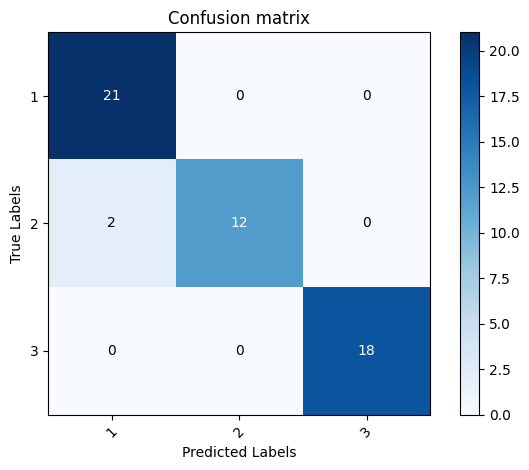

In [8]:
print("result:")
print("                {}         {}         {}".format("precision","recall","f1-score"))
for i in range(3):
    print("        {}         {:.3f}            {:.3f}           {:.3f}".format(i+1,Precision[i],Recall[i],F1[i]))
print()
print("macro_avg         {:.3f}            {:.3f}           {:.3f}".format(round(macro_P,3),round(macro_R,3),round(macro_F1,3)))
    
PlotConfusionMatrix(X)

### 高级要求
在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值。

In [9]:
#计算TPR、FPR
pre_score = np.array(pre_score)
TPR = [[],[],[]]
FPR = [[],[],[]]
for i in range(3):
    scores = pre_score[:,i]
    scores_Sort = np.sort(scores)
    for j in range(len(test_y)-1,-1,-1):
        threshold = scores_Sort[j]
        t = 0
        f = 0
        for k in range(len(test_y)):
            if (scores[k] >= threshold):
                if(test_y[k] == i):
                    t += 1
                else:
                    f += 1
        FPR[i].append( f / (np.sum(test_len)-test_len[i]) )
        TPR[i].append( t /test_len[i])


#计算AUC        
AUC = []
for i in range(3):
    s = 0
    for j in  range(len(FPR[i])-1):
        s += (FPR[i][j+1]-FPR[i][j])*(TPR[i][j])
    AUC.append(s)

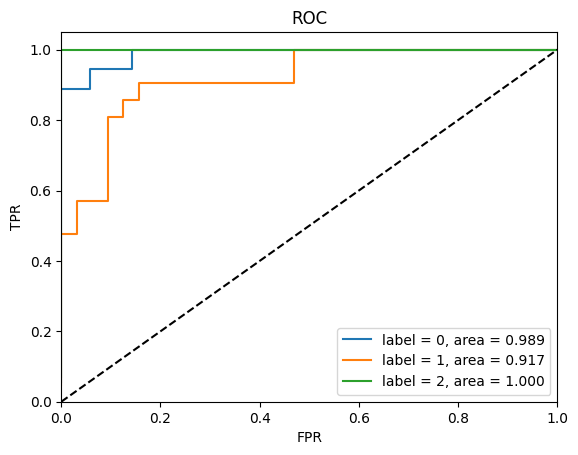

In [10]:
# 绘图
import matplotlib.pyplot as plt
plt.figure()
plt.plot(FPR[0], TPR[0],  label='label = 0, area = %0.3f' % ( AUC[0]))
plt.plot(FPR[1], TPR[1],  label='label = 1, area = %0.3f' % ( AUC[1]))
plt.plot(FPR[2], TPR[2],  label='label = 2, area = %0.3f' % ( AUC[2]))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()